# Some notes



The classic ADHD patient in most people's minds is the overly energetic, disruptive 9-year-old boy who loves to jump off dangerously high things and seems to be driven by a motor. In reality, only 20 to 25 percent of people with ADHD fit the hyperactive subtype.  There are three subtypes recognized in the diagnostic criteria:

1. Predominantly Hyperactive/Impulsive ADHD – see above
2. Predominantly Inattentive ADHD – lack of focus and attention are the primary symptoms, not hyperactivity
3. Combined Type ADHD – when inattention, hyperactivity, and impulsivity go hand-in-hand


## Required libs

In [1]:
#Requiered libs
import pandas as pd
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Set general style of plots(optional)
mpl.style.use(['ggplot'])

#path to csv files of Bio bank database
path_to_data="/home/gari/Desktop/master_tesis_v2/Data/"

#add path to OFHandlers.py (Object file handlers)
sys.path.append("/home/gari/Desktop/master_tesis_v2/")

#import Object file handler
#I build this script to easy the call
#to pickle save and load from disk.
from OFHandlers import OFHandlers as OFH

## Auxiliar functions

In [2]:
#auxiliar functions
def f_df(df,col,value):
    """
    Return a DataFrame filter
    by a single column.
    """
    return df[df[col]==value]


def u_df(df,col):
    """
    Return the unique values
    of a column.
    """
    return df[col].unique()


def generate_plots_gender(df,title,by_c="Sex",size=(17,9),rot=90):
    """
    Generete distributions plot
    for visual exploration.
    """
    fig=plt.figure(figsize=size)

    ax0=fig.add_subplot(2,2,1)
    ax1=fig.add_subplot(2,2,2)

    ax2=fig.add_subplot(2,2,3)
    ax3=fig.add_subplot(2,2,4)

    df[by_c].value_counts().plot(kind="pie",
                                  autopct='%1.1f%%',
                                  startangle=rot,
                                  shadow=True,
                                  ax=ax0,
                                  colors=colors_list)
    
    ax1.set_title("Subjects Gender %. Age < 18")
    df[["Age",by_c]].boxplot(by=by_c,ax=ax1)
    ax0.set_title("distribution by "+by_c+" total: "+str(len(df)))

    df[by_c].value_counts().plot(kind="barh",ax=ax2,color=colors_list)

    i=1
    for label, df in df[["Age",by_c]].groupby(by_c):
        df.Age.plot(kind="kde", ax=ax3, label=label,color=colors_list[i])
        i=i-1
    #plt.title(title)
    fig.suptitle(title, fontsize=14)
    plt.legend()
    


## Read cvs files from Biobank

In [3]:
#read diagnosis csv
diganosis=pd.read_csv(path_to_data+"BioBankInfo/patients_diagnosis.csv")

#ajust Identifiers col, to get only the actual identifier.
diganosis["Identifiers"]=diganosis["Identifiers"].str.replace(",assessment","").str.strip()

#ajust the name of the columns
col_names=diganosis.columns
replace_dict={each:each.split(",")[1] for each in col_names if len(each.split(","))>1}
diganosis.rename(columns=replace_dict,inplace=True)

#set the Identifiers as index
diganosis.set_index("Identifiers",inplace=True)

#check everything is ok
diganosis.head()

,Administration,Comment_ID,DX_01,DX_01_ByHx,DX_01_Cat,DX_01_Code,DX_01_Confirmed,DX_01_New,DX_01_PRem,DX_01_Past_Doc,...,SWAN_17,SWAN_18,SWAN_HY,SWAN_IN,SWAN_Total,Season,Site,Study,Visit_label,Year
Identifiers,,,,,,,,,,,,,,,,,,,,,
NDARAA075AMK,All,NaN,No Diagnosis Given,0.0,No Diagnosis Given,No Diagnosis Given,NaN,0.0,0.0,NaN,...,-2.0,-1.0,-2.444444,-2.111111,-2.277777,Summer,2,HBN,NaN,2016
NDARAA117NEJ,All,NaN,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,NaN,1.0,0.0,NaN,...,1.0,1.0,0.555555,-1.111111,-0.277777,Winter,1,HBN,NaN,2017
NDARAA504CRN,All,NaN,ADHD-Inattentive Type,0.0,Neurodevelopmental Disorders,F90.0,1.0,NaN,NaN,NaN,...,1.0,1.0,0.222222,0.555555,0.388888,Summer,3,HBN,NaN,2019
NDARAA536PTU,All,NaN,ADHD-Inattentive Type,0.0,Neurodevelopmental Disorders,F90.0,NaN,0.0,0.0,NaN,...,0.0,0.0,-0.111111,1.000000,0.444444,Spring,2,HBN,NaN,2016
NDARAA947ZG5,All,NaN,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,1.0,NaN,NaN,NaN,...,1.0,2.0,1.333333,1.555555,1.444444,Summer,1,HBN,NaN,2019


In [4]:
#read physical measurements
physical=pd.read_csv(path_to_data+"BioBankInfo/patients_physical.csv")

#ajust Identifiers col, to get only the actual identifier.
physical["Identifiers"]=physical["Identifiers"].str.replace(",assessment","").str.strip()

#ajust the nane of the columns
col_names=physical.columns
replace_dict={each:each.split(",")[1] for each in col_names if len(each.split(","))>1}
physical.rename(columns=replace_dict,inplace=True)

#set the indentifier as index
physical.set_index("Identifiers",inplace=True)

#check everything is ok
physical.head()

,Administration,Age,BMI,BMI_Range,Comment_ID,Data_entry,Days_Baseline,Diastolic_BP,EID,HeartRate,...,START_DATE,Season,Sex,Site,Study,Systolic_BP,Visit_label,Waist_Circumference,Weight,Year
Identifiers,,,,,,,,,,,,,,,,,,,,,
NDARAA075AMK,All,6.728040,14.858469,Healthy Weight,NaN,Complete,0,101.0,NDARAA075AMK,60.0,...,1901-01-01T07:00:00Z,Summer,F,2,HBN,127.0,NaN,21.0,42.8,2016
NDARAA112DMH,All,5.545744,15.412484,Healthy Weight,NaN,Complete,0,64.0,NDARAA112DMH,101.0,...,1901-01-01T07:00:00Z,Fall,M,1,HBN,108.0,NaN,19.0,39.6,2016
NDARAA117NEJ,All,7.475929,17.205673,Healthy Weight,NaN,Complete,0,71.0,NDARAA117NEJ,80.0,...,1901-01-01T07:00:00Z,Fall,M,1,HBN,107.0,NaN,24.0,61.8,2016
NDARAA358BPN,All,11.853296,NaN,NaN,NaN,Complete,220,NaN,NDARAA358BPN,NaN,...,1901-01-01T07:00:00Z,Summer,M,1,HBN,NaN,NaN,NaN,NaN,2018
NDARAA504CRN,All,9.165297,16.511573,Healthy Weight,NaN,Complete,26,67.0,NDARAA504CRN,87.0,...,1901-01-01T07:00:00Z,Summer,F,3,HBN,118.0,NaN,NaN,73.0,2019


## Let us explore the physcial measurements of the subjects

In [5]:
select_dignosis_cols=["DX_01","DX_02",
                      "DX_03","DX_04",
                      "DX_05","DX_06",
                      "DX_07","DX_08",
                      "DX_09","DX_10"]
subjects=diganosis[select_dignosis_cols].join(physical)

In [6]:
subjects.describe()

,Age,BMI,Comment_ID,Days_Baseline,Diastolic_BP,HeartRate,Height,PSCID,Site,Systolic_BP,Visit_label,Waist_Circumference,Weight,Year
count,2812.000000,2600.000000,0.0,2812.000000,2536.000000,2551.000000,2606.000000,0.0,2812.000000,2536.000000,0.0,1088.000000,2604.000000,2812.000000
mean,10.482501,19.524899,NaN,57.208037,67.899448,80.975696,55.860687,NaN,1.756046,114.645899,NaN,27.209559,91.313287,2017.394026
std,3.609182,5.094708,NaN,79.510668,12.097490,13.464703,7.650042,NaN,0.967388,14.329072,NaN,5.518408,44.010263,1.088313
min,5.003878,9.693766,NaN,0.000000,14.000000,46.000000,33.000000,NaN,1.000000,60.000000,NaN,18.000000,0.000000,2015.000000
25%,7.615188,15.969742,NaN,0.000000,60.000000,72.000000,50.000000,NaN,1.000000,106.000000,NaN,23.000000,57.950000,2017.000000
50%,9.826032,18.208080,NaN,41.000000,67.000000,81.000000,55.000000,NaN,1.000000,113.000000,NaN,26.000000,79.200000,2018.000000
75%,12.886863,21.783796,NaN,80.000000,73.000000,89.000000,62.000000,NaN,3.000000,122.000000,NaN,30.000000,115.450000,2018.000000
max,21.816563,59.132048,NaN,733.000000,145.000000,139.000000,78.500000,NaN,4.000000,203.000000,NaN,51.000000,315.000000,2019.000000


In [7]:
#check column names
subjects.columns

Index(['DX_01', 'DX_02', 'DX_03', 'DX_04', 'DX_05', 'DX_06', 'DX_07', 'DX_08',
       'DX_09', 'DX_10', 'Administration', 'Age', 'BMI', 'BMI_Range',
       'Comment_ID', 'Data_entry', 'Days_Baseline', 'Diastolic_BP', 'EID',
       'HeartRate', 'Height', 'PSCID', 'START_DATE', 'Season', 'Sex', 'Site',
       'Study', 'Systolic_BP', 'Visit_label', 'Waist_Circumference', 'Weight',
       'Year'],
      dtype='object')

In [8]:
#Filter to subject less than 12
subjects_12=subjects[subjects["Age"]<=12]

In [9]:
OFH.save_object("/home/gari/Desktop/master_tesis_v2/Data/subjects_12.file",subjects_12)

## All subjects

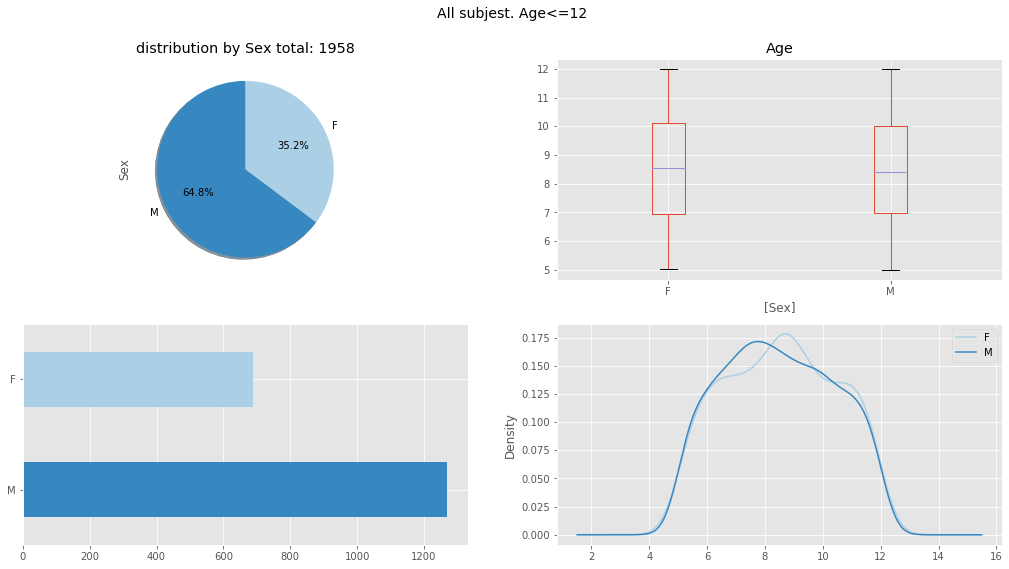

In [9]:
colors_list=sns.color_palette("Blues", 2)
colors_list.reverse()
#mpl.style.use('classic')
generate_plots_gender(subjects_12,"All subjest. Age<=12")


## ADHD-Hyperactive/Impulsive Type subjects

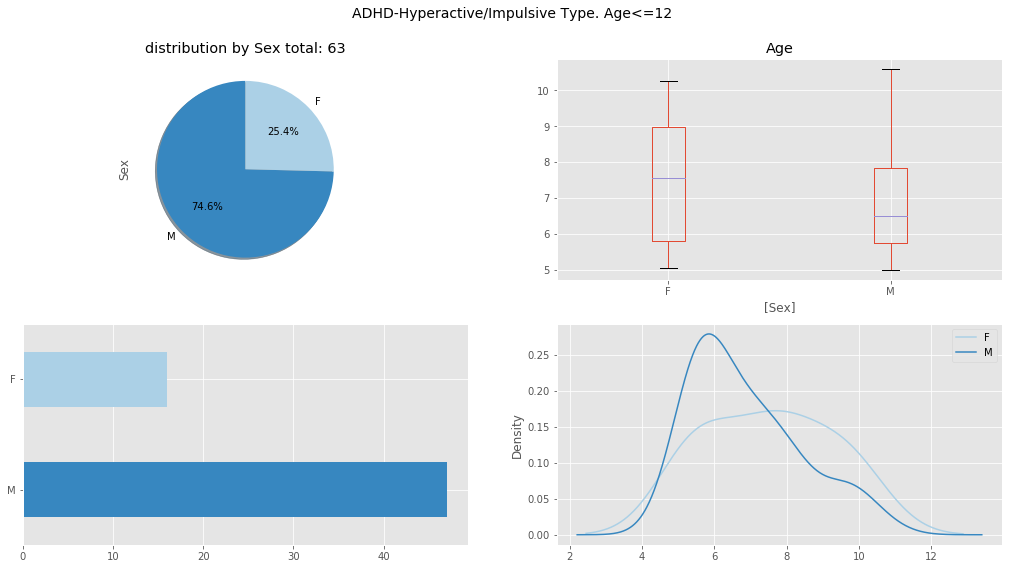

In [10]:
df=f_df(subjects_12,"DX_01","ADHD-Hyperactive/Impulsive Type")
generate_plots_gender(df,"ADHD-Hyperactive/Impulsive Type. Age<=12")

## ADHD-Inattentive Type subjects

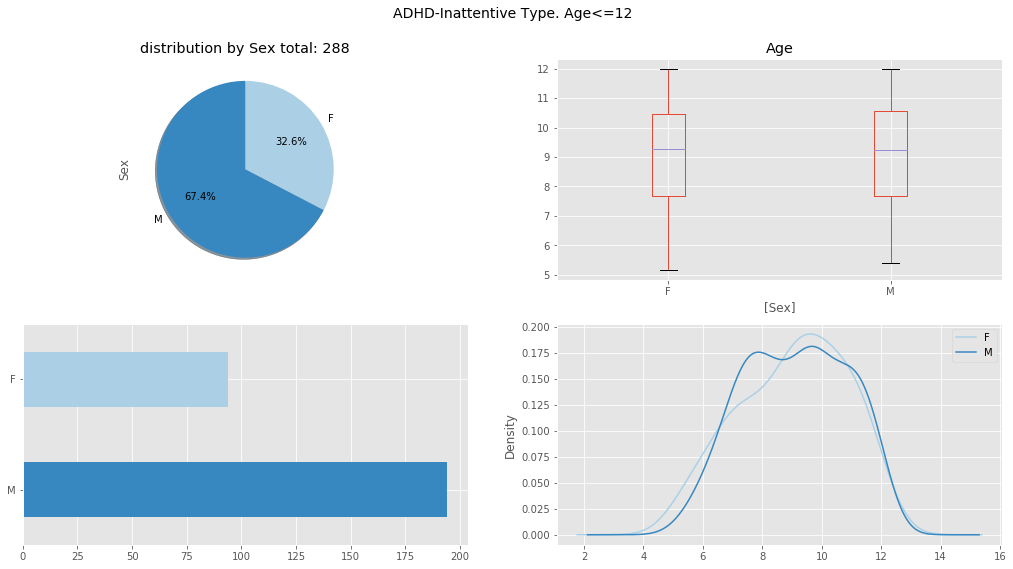

In [11]:
df=f_df(subjects_12,"DX_01","ADHD-Inattentive Type")
generate_plots_gender(df,"ADHD-Inattentive Type. Age<=12")

## ADHD-Combined Type subjects

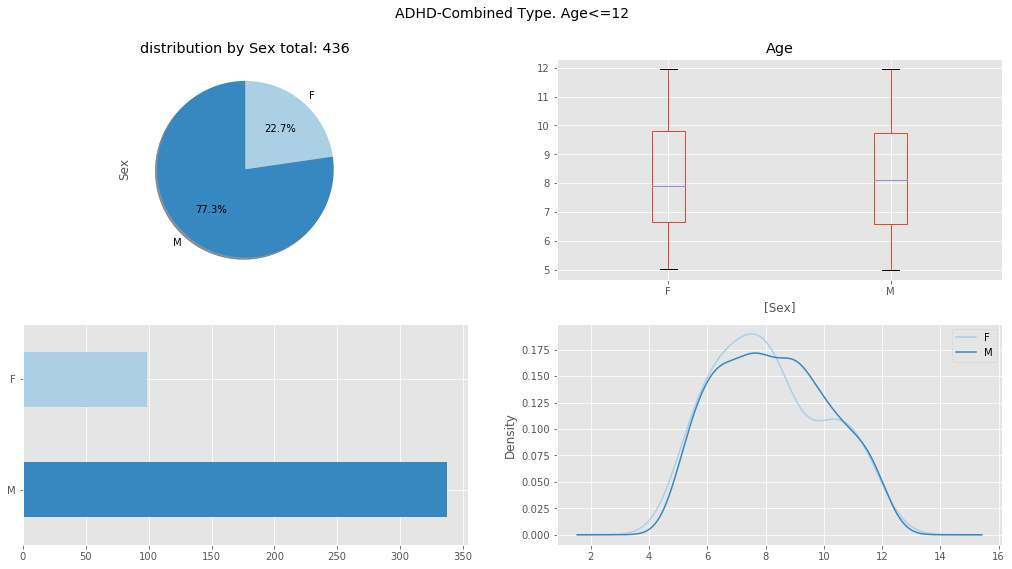

In [12]:
df=f_df(subjects_12,"DX_01","ADHD-Combined Type")
generate_plots_gender(df,"ADHD-Combined Type. Age<=12")

## Let's explore ADHD Primary diagnosis

In [13]:
# select ADHD primary diagnosis
# Replace NaN entries
df = subjects_12[(subjects_12["DX_01"] =="ADHD-Inattentive Type")|
                 (subjects_12["DX_01"] =="ADHD-Hyperactive/Impulsive Type")|
                (subjects_12["DX_01"] =="ADHD-Combined Type")].fillna("Not Available")

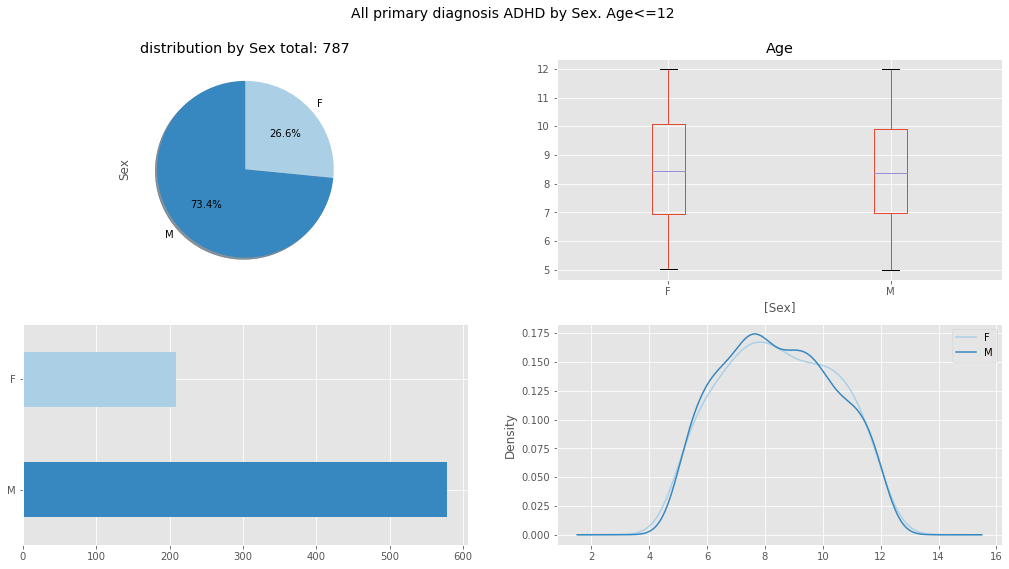

In [14]:
generate_plots_gender(df,"All primary diagnosis ADHD by Sex. Age<=12")

In [15]:
colors_list=sns.color_palette("Blues", 3)
colors_list.reverse()

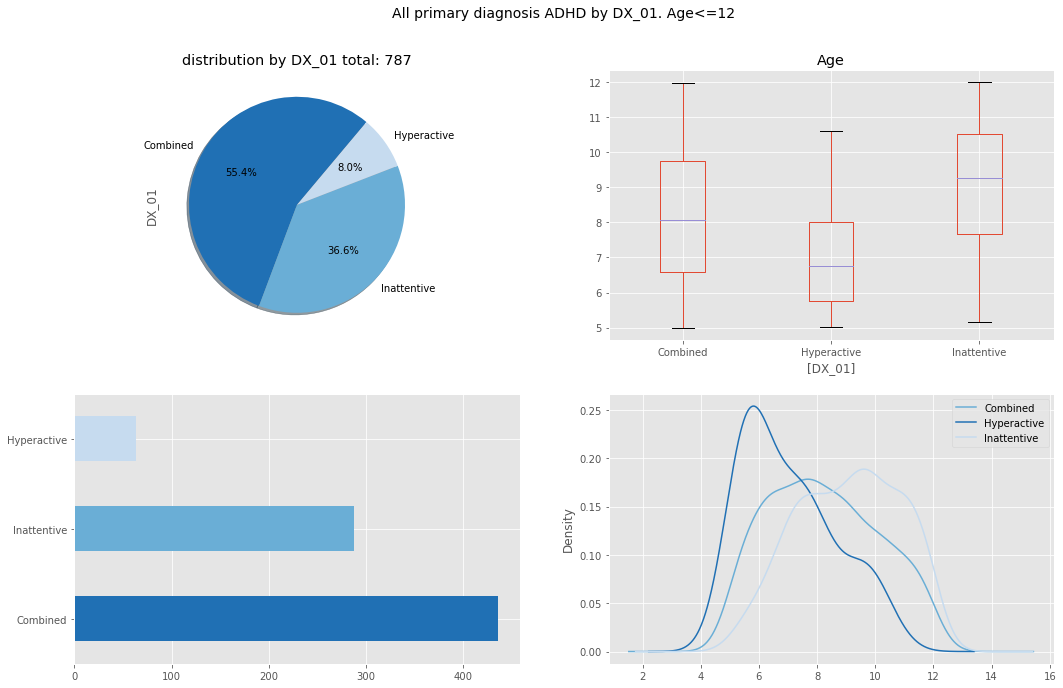

In [16]:
df_temp=df.replace("ADHD-Inattentive Type","Inattentive").copy()
df_temp=df_temp.replace("ADHD-Hyperactive/Impulsive Type","Hyperactive")
df_temp=df_temp.replace("ADHD-Combined Type","Combined")

generate_plots_gender(df_temp,"All primary diagnosis ADHD by DX_01. Age<=12",by_c="DX_01",size=(17,11),rot=50)

# Let's select our subjects

In [17]:
#list of secondary + to exclude
list_of_diagnosis_to_exclude=["Autism",
                              "Disability-Mild",
                              "Tourettes",
                              "Tic",
                              "Learning",
                              "Insomnia",
                              "Language",
                              "Depressive",
                              "Anxiety",
                              "Impulse",
                              "Trauma",
                              "Schizophrenia",
                             "Trichotillomania",
                             "Pica",
                             "Obsessive-Compulsive",
                             "Encopresis",
                             "Non-Rapid Eye Movement",
                             "Communication Disorder"]

In [18]:
def subject_identifier(df_subject,primary_diagnosis,list_to_exclude,select_dignosis_cols):
    df=f_df(df_subject,"DX_01",primary_diagnosis).fillna("Not Available").copy()
    for each_dig in select_dignosis_cols:
        for exclude_dia in list_of_diagnosis_to_exclude:
            df=df[~df[each_dig].str.contains(exclude_dia)]
    #check remeaning values
    for each_dig in select_dignosis_cols:
        print(u_df(df,each_dig))
    return df
    


<div style="height:80px;background-color:darkblue;color:white"><center><h1>Selected ADHD-Inattentive Type</h1></center></div>

['ADHD-Inattentive Type']
['Not Available' 'Oppositional Defiant Disorder' 'Enuresis'
 'Adjustment Disorders' 'Disruptive Mood Dysregulation Disorder'
 'Specific Phobia' 'Reactive Attachment Disorder'
 'Excoriation (Skin-Picking) Disorder']
['Not Available' 'Enuresis' 'Specific Phobia' 'ADHD-Combined Type']
['Not Available' ' ' 'Disruptive Mood Dysregulation Disorder']
['Not Available' 'Conduct Disorder-Childhood-onset type']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']


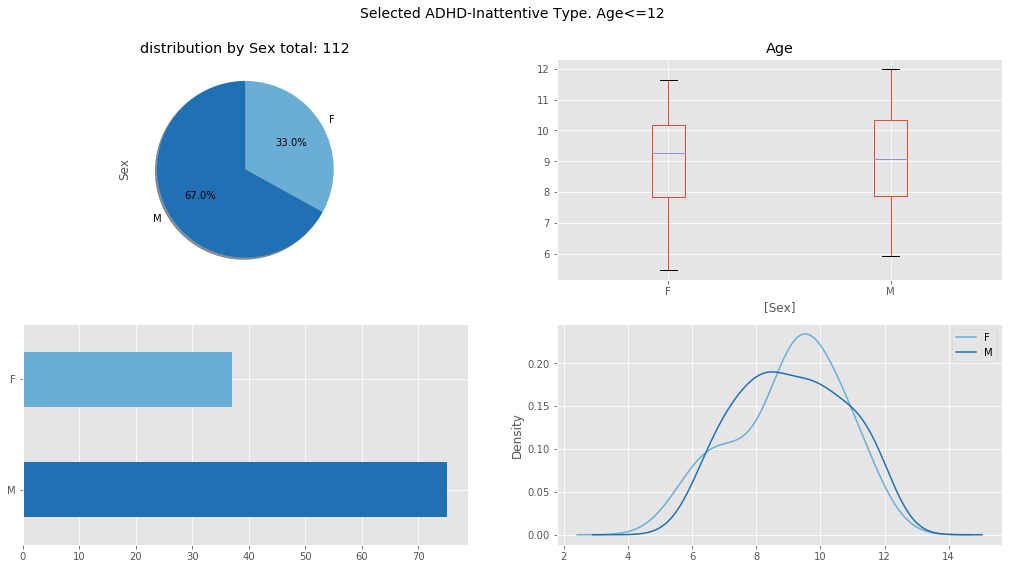

In [19]:
df_inattentive=subject_identifier(subjects_12,
                                  "ADHD-Inattentive Type",
                                  list_of_diagnosis_to_exclude,
                                  select_dignosis_cols)
generate_plots_gender(df_inattentive,"Selected ADHD-Inattentive Type. Age<=12")

<div style="height:80px;background-color:darkblue;color:white"><center><h1>Selected ADHD-Hyperactive/Impulsive Type</h1></center></div>

['ADHD-Hyperactive/Impulsive Type']
['Oppositional Defiant Disorder' 'Not Available' 'Specific Phobia' ' ']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']


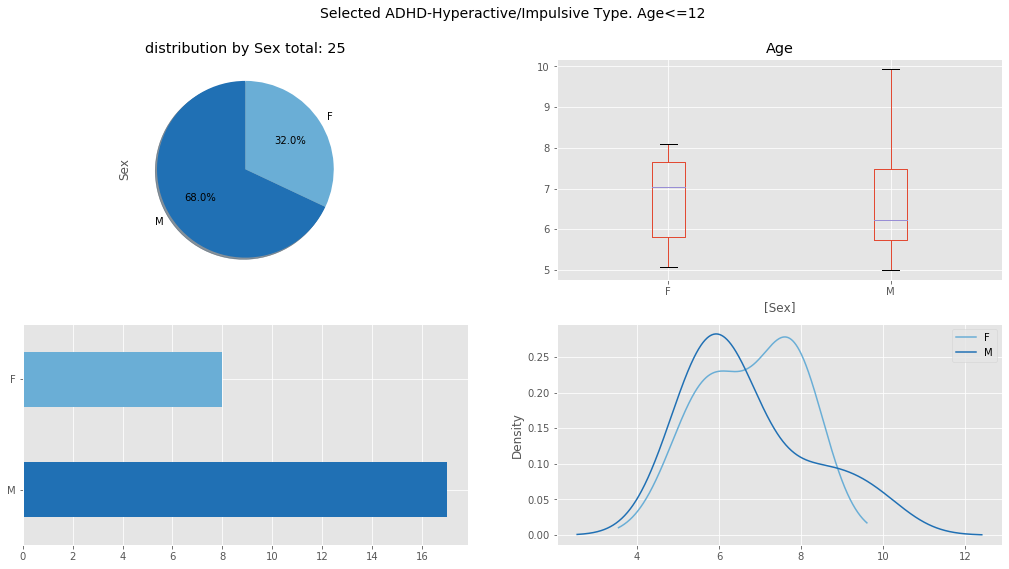

In [20]:
df_hyperactive=subject_identifier(subjects_12,
                                  "ADHD-Hyperactive/Impulsive Type",
                                  list_of_diagnosis_to_exclude,
                                  select_dignosis_cols)
generate_plots_gender(df_hyperactive,"Selected ADHD-Hyperactive/Impulsive Type. Age<=12")


<div style="height:80px;background-color:darkblue;color:white"><center><h1>Selected ADHD-Combined Type</h1></center></div>

['ADHD-Combined Type']
['Oppositional Defiant Disorder' 'Enuresis' 'Not Available'
 'Disruptive Mood Dysregulation Disorder' 'Specific Phobia'
 'Speech Sound Disorder' 'Adjustment Disorders'
 'Excoriation (Skin-Picking) Disorder'
 'Other Specified Elimination Disorder with Urinary Symptoms'
 'Intermittent Explosive Disorder']
['Not Available' 'Specific Phobia'
 'Avoidant/Restrictive Food Intake Disorder' 'Enuresis'
 'Speech Sound Disorder' 'Oppositional Defiant Disorder'
 'Parent-Child Relational Problem']
['Not Available' 'Specific Phobia']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']


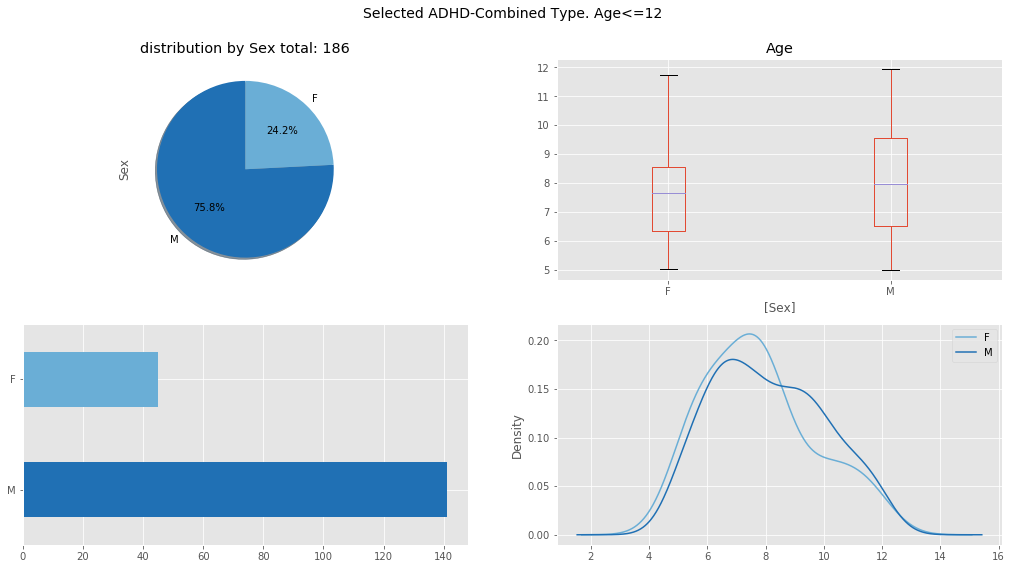

In [21]:
df_combined=subject_identifier(subjects_12,
                                  "ADHD-Combined Type",
                                  list_of_diagnosis_to_exclude,
                                  select_dignosis_cols)
generate_plots_gender(df_combined,"Selected ADHD-Combined Type. Age<=12")

<div style="height:80px;background-color:darkblue;color:white"><center><h1>Healthy</h1></center></div>

['No Diagnosis Given']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']
['Not Available']


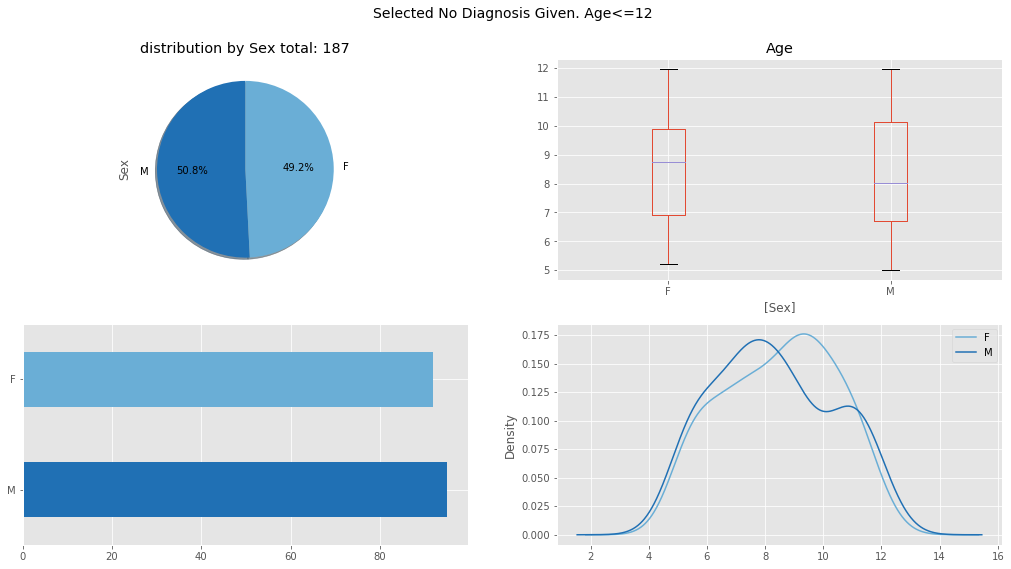

In [22]:
df_healthy=subject_identifier(subjects_12,
                                  "No Diagnosis Given",
                                  list_of_diagnosis_to_exclude,
                                  select_dignosis_cols)
generate_plots_gender(df_healthy,"Selected No Diagnosis Given. Age<=12")

# Save selected subjects to disk

In [23]:
OFH.save_object(path_to_data+"BioBankInfo/indi_inattentive.file",list(df_inattentive.index))
OFH.save_object(path_to_data+"BioBankInfo/indi_hyperactive.file",list(df_hyperactive.index))
OFH.save_object(path_to_data+"BioBankInfo/indi_combined.file",list(df_combined.index))
OFH.save_object(path_to_data+"BioBankInfo/indi_healthy.file",list(df_healthy.index))
#download_healthy

# After saving the list of selected subject, you need to run 1_downloader_indi_data.py to download the EEG signal
Note that some of subject may have incomplete data, so you might endup with less subjects
than what you selected

## Let us explore what we downloaded

<div style="height:80px;background-color:darkred;color:white"><center><h1>Downloaded ADHD-Inattentive Type</h1></center></div>

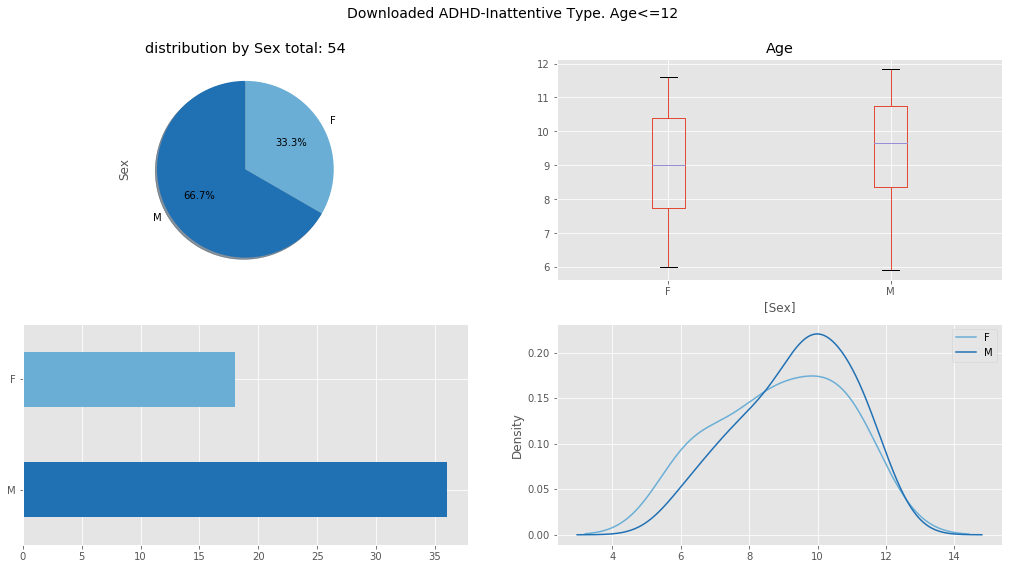

In [37]:
focus="inattentive"
title="Downloaded ADHD-Inattentive Type. Age<=12"

path_files_subjects='/media/gari/extra_ssd/RawBiobankData/'+focus
good=os.listdir(path_files_subjects)
generate_plots_gender(subjects_12.loc[good],title)

<div style="height:80px;background-color:darkred;color:white"><center><h1>Downloaded hyperactive Type</h1></center></div>

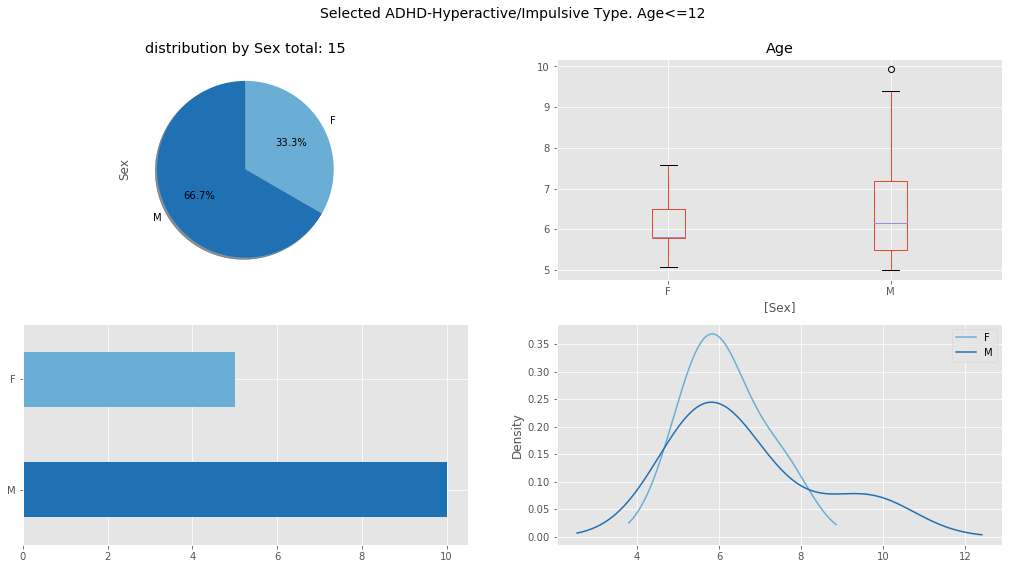

In [38]:
focus="hyperactive"
title="Selected ADHD-Hyperactive/Impulsive Type. Age<=12"

path_files_subjects='/media/gari/extra_ssd/RawBiobankData/'+focus
good=os.listdir(path_files_subjects)
generate_plots_gender(subjects_12.loc[good],title)

<div style="height:80px;background-color:darkred;color:white"><center><h1>Downloaded combined Type</h1></center></div>

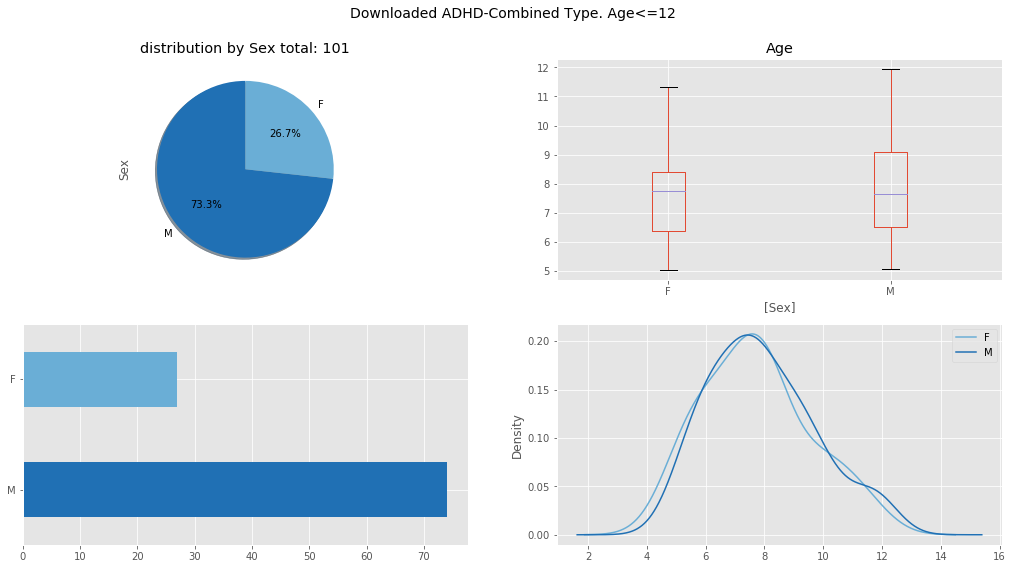

In [39]:
focus="combined"
title="Downloaded ADHD-Combined Type. Age<=12"

path_files_subjects='/media/gari/extra_ssd/RawBiobankData/'+focus
good=os.listdir(path_files_subjects)
generate_plots_gender(subjects_12.loc[good],title)

<div style="height:80px;background-color:darkred;color:white"><center><h1>Downloaded healthy</h1></center></div>

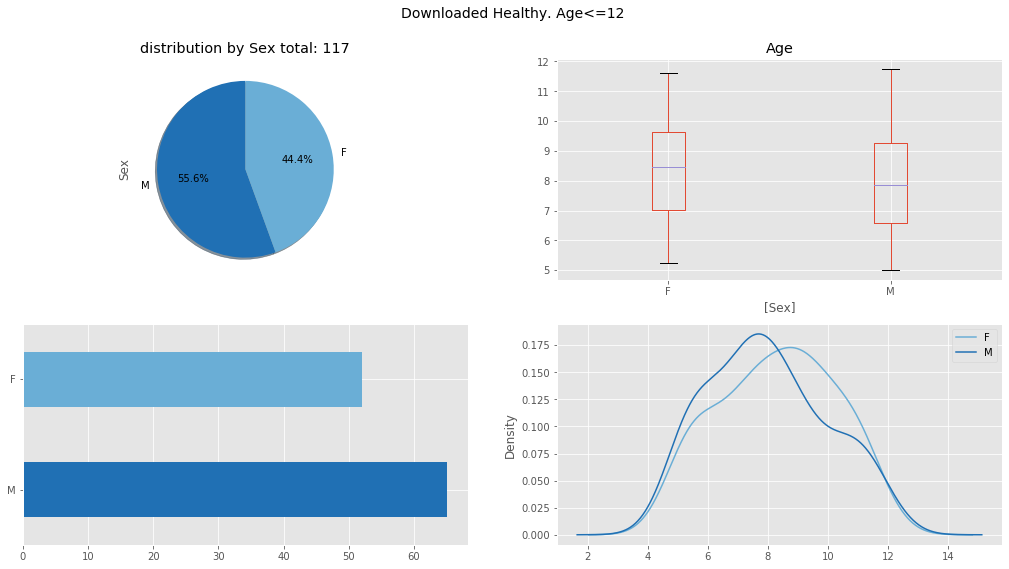

In [40]:
path_files_subjects='/media/gari/extra_ssd/RawBiobankData/'+focus
good=os.listdir(path_files_subjects)
generate_plots_gender(subjects_12.loc[good],title)

## Summary

In [47]:
inattentive=os.listdir("/media/gari/extra_ssd/RawBiobankData/inattentive")
hyperactive=os.listdir("/media/gari/extra_ssd/RawBiobankData/hyperactive")
combined=os.listdir("/media/gari/extra_ssd/RawBiobankData/combined")
healthy=os.listdir("/media/gari/extra_ssd/RawBiobankData/healthy")
print("total inattentive: ",len(inattentive))
print("total hyperactive: ",len(hyperactive))
print("total combined: ",len(combined))
print("total healthy: ",len(healthy))
print("total subject: ",len(inattentive)+len(hyperactive)+len(combined)+len(healthy))

total inattentive:  54
total hyperactive:  15
total combined:  101
total healthy:  117
total subject:  287


# Select train and test

In [2]:
#get list of available subject
list_inattentive=os.listdir("/media/gari/extra_ssd/RawBiobankData/inattentive")
list_hyperactive=os.listdir("/media/gari/extra_ssd/RawBiobankData/hyperactive")
list_combined=os.listdir("/media/gari/extra_ssd/RawBiobankData/combined")
list_healthy=os.listdir("/media/gari/extra_ssd/RawBiobankData/healthy")

In [3]:
#train
list_inattentive_train=list_inattentive[0:44]
list_hyperactive_train=list_hyperactive[0:13]
list_combined_train=list_combined[0:43]
list_healthy_train=list_healthy[0:100]

#test
list_inattentive_test=list_inattentive[44:]
list_hyperactive_test=list_hyperactive[13:]
list_combined_test=list_combined[43:]
list_healthy_test=list_healthy[100:]

In [4]:
# keep trainig balanced
print(len(list_inattentive_train))
print(len(list_hyperactive_train))
print(len(list_combined_train))
print(len(list_healthy_train))
print("*"*100)
print("total train:",len(list_inattentive_train)+len(list_hyperactive_train)+
      len(list_combined_train)+len(list_healthy_train))

print("healthy train:",len(list_healthy_train))
print("ADHD train:",len(list_inattentive_train)+len(list_hyperactive_train)+len(list_combined_train))

44
13
43
100
****************************************************************************************************
total train: 200
healthy train: 100
ADHD train: 100


In [11]:
#validation
from_inattentive=select_from_each_grup(inattentive_train_mp,7)
from_healthy=select_from_each_grup(healthy_train_mp,15)
from_hyperactive=select_from_each_grup(hyperactive_train_mp,3)
from_combined=select_from_each_grup(combined_train_mp,5)

30.0

In [5]:
# test is not balanced
print("list_inattentive_test",len(list_inattentive_test))
print("list_hyperactive_test",len(list_hyperactive_test))
print("list_combined_test",len(list_combined_test))
print("list_healthy_test",len(list_healthy_test))
print("*"*100)
print("total test:",len(list_inattentive_test)+len(list_hyperactive_test)+
      len(list_combined_test)+len(list_healthy_test))

print("healthy test:",len(list_healthy_test))
print("ADHD test:",len(list_inattentive_test)+len(list_hyperactive_test)+len(list_combined_test))

list_inattentive_test 10
list_hyperactive_test 2
list_combined_test 58
list_healthy_test 17
****************************************************************************************************
total test: 87
healthy test: 17
ADHD test: 70


In [23]:
concat_signal_train=OFH.load_object("/home/gari/Desktop/master_tesis_v2/adhd_detector_v2/Data/healthy_train_signal.file")
concat_signal_test=OFH.load_object("/home/gari/Desktop/master_tesis_v2/adhd_detector_v2/Data/healthy_test_signal.file")


In [21]:
#concat_signal_train.y=np.ones(len(concat_signal_train.y)).astype(int)
#concat_signal_test.y=np.ones(len(concat_signal_test.y)).astype(int)

In [22]:
#OFH.save_object("/home/gari/Desktop/master_tesis_v2/adhd_detector_v2/Data/healthy_train_signal.file",concat_signal_train)
#OFH.save_object("/home/gari/Desktop/master_tesis_v2/adhd_detector_v2/Data/healthy_test_signal.file",concat_signal_test)
